In [1]:
import pandas as pd

# Loading Dataset

In [2]:
df = pd.read_csv("Dataset.csv", encoding='latin-1')

In [3]:
df.head()

,Job Title,Job Description,Skills,Certifications
0,Admin Big Data,Responsible for managing and overseeing big da...,"Hadoop, Spark, MapReduce, Data Lakes, Data War...","Cloudera Certified Professional (CCP), Hortonw..."
1,Ansible Operations Engineer,Focuses on automating IT processes using Ansib...,"Ansible, Linux, Automation, Cloud Platforms, C...",Red Hat Certified Specialist in Ansible Automa...
2,Artifactory Administrator,Manages the Artifactory repository for build a...,"Artifactory, CI/CD, Jenkins, Docker, Maven, Gr...","JFrog Artifactory Certification, DevOps Instit..."
3,Artificial Intelligence / Machine Learning Leader,"Leads AI/ML projects and teams, defining strat...","AI Strategy, Machine Learning, Team Management...","AI-900: Microsoft Azure AI Fundamentals, Certi..."
4,Artificial Intelligence / Machine Learning Sr....,Senior role overseeing multiple AI/ML initiati...,"AI Strategy, Machine Learning, Team Management...",Certified Artificial Intelligence Practitioner...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        493 non-null    object
 1   Job Description  493 non-null    object
 2   Skills           493 non-null    object
 3   Certifications   493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB


In [5]:
df.describe()

,Job Title,Job Description,Skills,Certifications
count,493,493,493,493
unique,469,463,440,425
top,INTERACTION DESIGNER,Implements and manages security measures to pr...,"JavaScript, Java, Python, Git, SQL, HTML, CSS,...","CompTIA IT Fundamentals+, Coding Bootcamp Cert..."
freq,2,4,8,10


In [6]:
df.columns

Index(['Job Title', 'Job Description', 'Skills', 'Certifications'], dtype='object')

In [7]:
# Convert Skills and Certifications from string to list
df['Skills'] = df['Skills'].apply(lambda x: [i.strip() for i in str(x).split(',')])
df['Certifications'] = df['Certifications'].apply(lambda x: [i.strip() for i in str(x).split(',')])
df[['Job Title', 'Skills', 'Certifications']].head()


,Job Title,Skills,Certifications
0,Admin Big Data,"[Hadoop, Spark, MapReduce, Data Lakes, Data Wa...","[Cloudera Certified Professional (CCP), Horton..."
1,Ansible Operations Engineer,"[Ansible, Linux, Automation, Cloud Platforms, ...",[Red Hat Certified Specialist in Ansible Autom...
2,Artifactory Administrator,"[Artifactory, CI/CD, Jenkins, Docker, Maven, G...","[JFrog Artifactory Certification, DevOps Insti..."
3,Artificial Intelligence / Machine Learning Leader,"[AI Strategy, Machine Learning, Team Managemen...","[AI-900: Microsoft Azure AI Fundamentals, Cert..."
4,Artificial Intelligence / Machine Learning Sr....,"[AI Strategy, Machine Learning, Team Managemen...",[Certified Artificial Intelligence Practitione...


C:\Users\Vedant\AppData\Local\Temp\ipykernel_48628\4080506238.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills_df, x='Count', y='Skill', palette='viridis')


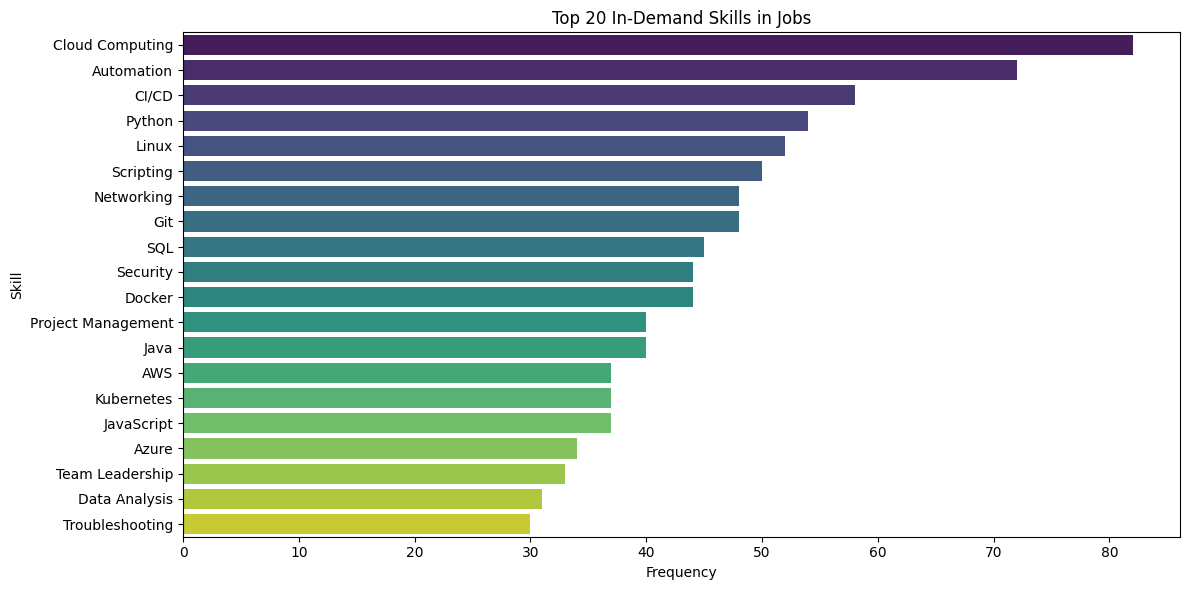

In [8]:
from collections import Counter
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns  

all_skills = sum(df['Skills'].tolist(), [])  # Flatten the list of lists
skill_counts = Counter(all_skills)

# Top 20 skills
top_skills = skill_counts.most_common(20)
top_skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_skills_df, x='Count', y='Skill', palette='viridis')
plt.title("Top 20 In-Demand Skills in Jobs")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


In [12]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Vedant\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


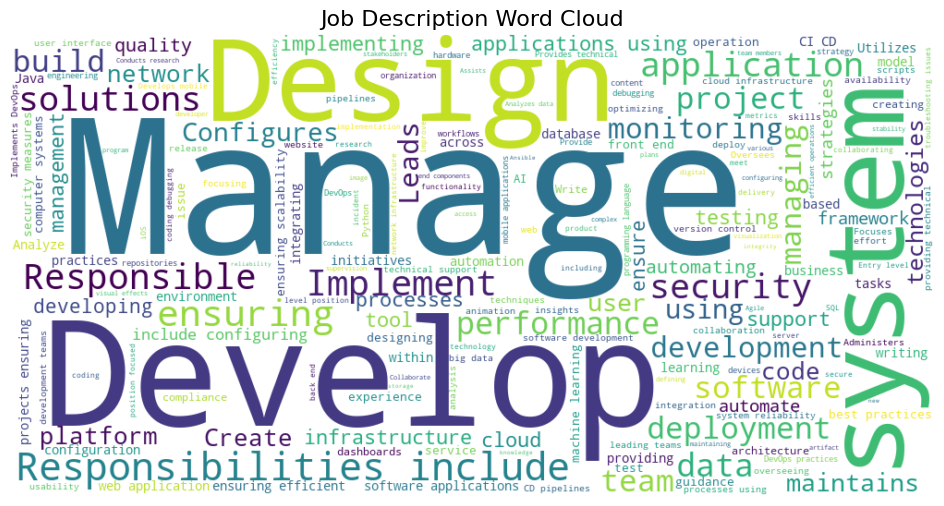

In [13]:
from wordcloud import WordCloud

# Make sure all descriptions are strings
df['Job Description'] = df['Job Description'].astype(str)

# Join all descriptions
text = ' '.join(df['Job Description'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Job Description Word Cloud", fontsize=16)
plt.show()


In [14]:
def recommend_jobs(student_skills, top_n=5):
    student_skills = [s.strip().lower() for s in student_skills]  # Normalize input
    recommendations = []

    for idx, row in df.iterrows():
        job_skills = [s.strip().lower() for s in row['Skills']]
        matched = list(set(student_skills) & set(job_skills))
        missing = list(set(job_skills) - set(student_skills))

        match_score = len(matched) / len(job_skills) if job_skills else 0

        recommendations.append({
            'Job Title': row['Job Title'],
            'Match %': round(match_score * 100, 2),
            'Matched Skills': matched,
            'Missing Skills': missing
        })

    # Sort by highest match %
    recommendations = sorted(recommendations, key=lambda x: x['Match %'], reverse=True)

    return recommendations[:top_n]


In [15]:
student_skills = ['Python', 'SQL', 'Machine Learning', 'Data Analysis']

results = recommend_jobs(student_skills)

for r in results:
    print(f"Job: {r['Job Title']}")
    print(f"Match %: {r['Match %']}%")
    print(f"✅ Matched Skills: {r['Matched Skills']}")
    print(f"❌ Missing Skills: {r['Missing Skills']}")
    print("-" * 50)


Job: ARTIFICIAL INTELLIGENCE RESEARCHER
Match %: 50.0%
✅ Matched Skills: ['python', 'data analysis']
❌ Missing Skills: ['research methodologies', 'ai/ml algorithms']
--------------------------------------------------
Job: BIG DATA SPECIALIST
Match %: 50.0%
✅ Matched Skills: ['sql', 'data analysis']
❌ Missing Skills: ['data mining', 'big data technologies']
--------------------------------------------------
Job: DATA ANALYST
Match %: 50.0%
✅ Matched Skills: ['sql', 'data analysis']
❌ Missing Skills: ['statistical analysis', 'data visualization']
--------------------------------------------------
Job: MACHINE LEARNING ENGINEER
Match %: 50.0%
✅ Matched Skills: ['python', 'data analysis']
❌ Missing Skills: ['model deployment', 'machine learning algorithms']
--------------------------------------------------
Job: BUSINESS INTELLIGENCE ANALYST
Match %: 50.0%
✅ Matched Skills: ['sql', 'data analysis']
❌ Missing Skills: ['business acumen', 'data visualization']
--------------------------------